In [1]:
import pandas as pd 
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import xarray
import xrspatial.multispectral as ms

# загружаем подготовленный набор изображений и меток с путями
df = pd.read_csv('data/train_metadata_my.csv')
df.head()

,chip_id,location,datetime,cloudpath,year,B02_path,B03_path,B04_path,B08_path,label_path
0,adwp,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/adwp,2020,J:\CloudCover\data\data\train_features\adwp\B0...,J:\CloudCover\data\data\train_features\adwp\B0...,J:\CloudCover\data\data\train_features\adwp\B0...,J:\CloudCover\data\data\train_features\adwp\B0...,J:\CloudCover\data\data\train_labels\adwp.tif
1,adwu,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/adwu,2020,J:\CloudCover\data\data\train_features\adwu\B0...,J:\CloudCover\data\data\train_features\adwu\B0...,J:\CloudCover\data\data\train_features\adwu\B0...,J:\CloudCover\data\data\train_features\adwu\B0...,J:\CloudCover\data\data\train_labels\adwu.tif
2,adwz,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/adwz,2020,J:\CloudCover\data\data\train_features\adwz\B0...,J:\CloudCover\data\data\train_features\adwz\B0...,J:\CloudCover\data\data\train_features\adwz\B0...,J:\CloudCover\data\data\train_features\adwz\B0...,J:\CloudCover\data\data\train_labels\adwz.tif
3,adxp,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/adxp,2020,J:\CloudCover\data\data\train_features\adxp\B0...,J:\CloudCover\data\data\train_features\adxp\B0...,J:\CloudCover\data\data\train_features\adxp\B0...,J:\CloudCover\data\data\train_features\adxp\B0...,J:\CloudCover\data\data\train_labels\adxp.tif
4,aeaj,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/aeaj,2020,J:\CloudCover\data\data\train_features\aeaj\B0...,J:\CloudCover\data\data\train_features\aeaj\B0...,J:\CloudCover\data\data\train_features\aeaj\B0...,J:\CloudCover\data\data\train_features\aeaj\B0...,J:\CloudCover\data\data\train_labels\aeaj.tif


In [2]:
def load_chip(row):
    data={
        "chip_id":row.iloc[0],
        "image":None,
        "label":None
    }
    band_arrs = []
    for band in row[5:9]:
        with rasterio.open(band) as b:
            band_arr = b.read(1).astype("float32")
        band_arrs.append(band_arr)

    x_arr = np.stack(band_arrs, axis=-1)
    data["image"] = np.transpose(x_arr, [2, 0, 1])

    with rasterio.open(row[9]) as lp:
        data["label"] = lp.read(1).astype("float32")
    return data

In [4]:
def get_label_mean(path):
    with rasterio.open(path) as lp:
        label = lp.read(1).astype("float32")
    return label.mean()

In [5]:
df['label_mean'] = df["label_path"].apply(get_label_mean)

In [6]:
df_clean= df[(df['label_mean'] < 1) & (df['label_mean'] > 0)]
df_clean.head()

,chip_id,location,datetime,cloudpath,year,B02_path,B03_path,B04_path,B08_path,label_path,label_mean
0,adwp,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/adwp,2020,J:\CloudCover\data\data\train_features\adwp\B0...,J:\CloudCover\data\data\train_features\adwp\B0...,J:\CloudCover\data\data\train_features\adwp\B0...,J:\CloudCover\data\data\train_features\adwp\B0...,J:\CloudCover\data\data\train_labels\adwp.tif,0.479294
1,adwu,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/adwu,2020,J:\CloudCover\data\data\train_features\adwu\B0...,J:\CloudCover\data\data\train_features\adwu\B0...,J:\CloudCover\data\data\train_features\adwu\B0...,J:\CloudCover\data\data\train_features\adwu\B0...,J:\CloudCover\data\data\train_labels\adwu.tif,0.636658
5,aeap,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/aeap,2020,J:\CloudCover\data\data\train_features\aeap\B0...,J:\CloudCover\data\data\train_features\aeap\B0...,J:\CloudCover\data\data\train_features\aeap\B0...,J:\CloudCover\data\data\train_features\aeap\B0...,J:\CloudCover\data\data\train_labels\aeap.tif,0.843662
6,aebi,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/aebi,2020,J:\CloudCover\data\data\train_features\aebi\B0...,J:\CloudCover\data\data\train_features\aebi\B0...,J:\CloudCover\data\data\train_features\aebi\B0...,J:\CloudCover\data\data\train_features\aebi\B0...,J:\CloudCover\data\data\train_labels\aebi.tif,0.943565
8,aeej,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/aeej,2020,J:\CloudCover\data\data\train_features\aeej\B0...,J:\CloudCover\data\data\train_features\aeej\B0...,J:\CloudCover\data\data\train_features\aeej\B0...,J:\CloudCover\data\data\train_features\aeej\B0...,J:\CloudCover\data\data\train_labels\aeej.tif,0.912453


In [7]:
df_clean.shape

(7963, 11)

In [12]:
# задать преобразования
import albumentations as A
a1 = A.Resize(128,128)

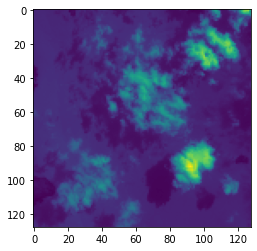

In [15]:
chip = load_chip(df_clean.iloc[0])
x_arr_transform6 = a1(image=chip['image'][0])["image"]
plt.imshow(x_arr_transform6)

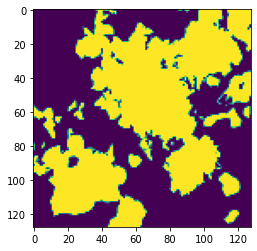

In [16]:
x_arr_transform7 = a1(image=chip['label'])["image"]
plt.imshow(x_arr_transform7)

In [ ]:
def resize_to_128(row):
    # возможно здесь понадобится сохранение в tif
    # или через растерио - в общем чтототам
    path1='J:\CloudCover\data\data\resized_features'
    path2='J:\CloudCover\data\data\resized_labels'
    for i in range(4):
        x_arr_transform = a1(image=chip['image'][i])["image"]
        plt.imsave(path1+f'\{row[0]}\{i}.tif', x_arr_transform, format="tif")

    with rasterio.open(band) as b:
        band_arr = b.read(1).astype("float32")




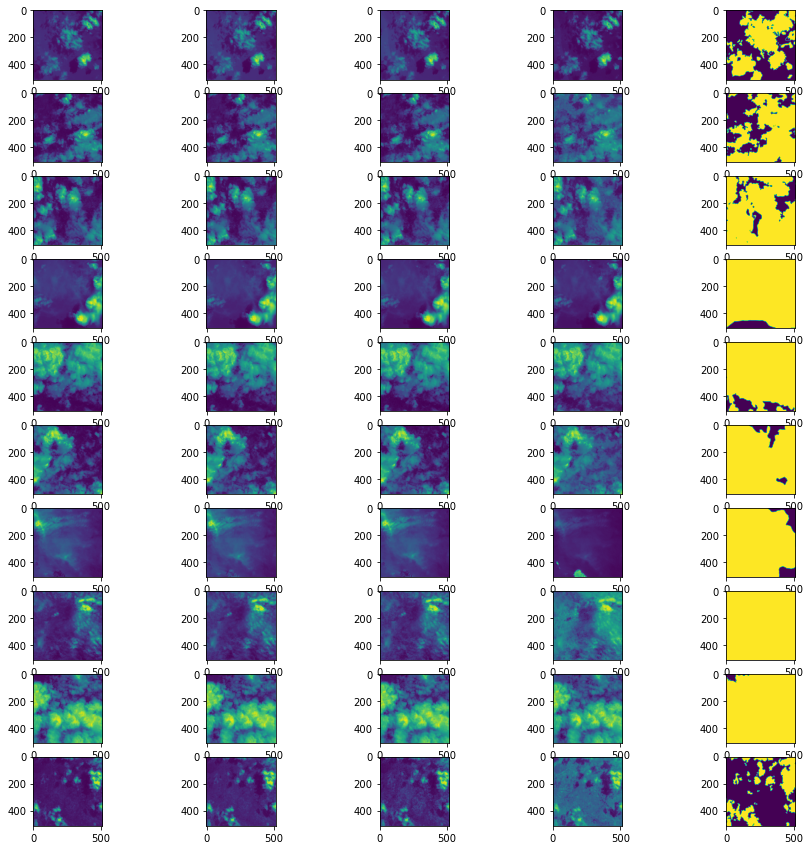

In [8]:
fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(15,15))

for i in range(0, 10):
    # задача этого цикла в итоге - не показывать результат - а сохранить все преобразованные изображения
    chip = load_chip(df_clean.iloc[i])
    if i < 10:
        axes[i, 0].imshow(chip["image"][0]);
        axes[i, 1].imshow(chip["image"][1]);
        axes[i, 2].imshow(chip["image"][2]);
        axes[i, 3].imshow(chip["image"][3]);
        axes[i, 4].imshow(chip["label"]);

<AxesSubplot:>

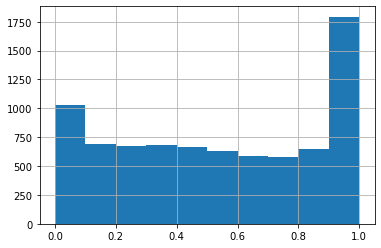

In [9]:
df_clean['label_mean'].hist()

In [11]:
# lc = load_chip(df_clean.iloc[7])
# plt.gcf().set_size_inches((15, 15))
# plt.imshow(lc["image"][0])

In [ ]:
# итоги предыдущих дней
# при воспроизведении baseline - занял 38 место из 512
# много проблем может возникнуть при попытке воспроизвести виртуальное окружение с нужными версиями
# при использовании se_resnext - качество обучения выше (как и выяснил Малоян)
# количество worker не влияет на вычисления на процессоре
# в google colab - считать бессмысленно - процессор там не тянет, и видеокарты слабые
# узнал о существовании новых признаков - коэффициентах растений, почвы, снега
# если будет частичное обучение с двумя классификаторами - можно использовать как другие признаки
# научился работать с pytorch, преобразования из pytorchvision, albumentations
# научился рисовать изображения по отдельным каналам и вместе, в сетке матплот
# научился менять размер изображения, делать случайные повороты, делать случайные вырезки

In [ ]:
# Направление 1 - Ускорение подбора параметров
# взять только 1000 снимков
# решаем задачу - уменьшить размер всех изображений до 128
# на этих данных выбрать лучшую модель
# на этих данных выбрать лучшее сочетание каналов

In [ ]:
# Направление 2 - Использование дополнительных снимков - создать для них метки с помощью алгоритма
# это и есть частичное обучение с учителем - 

In [ ]:
# Направление 3 - Улучшение процесса тренировки - как использовать колбеки, как дообучать модель
# - контролировать процесс обучения, рисовать графики уменьшения ошибки

In [ ]:
### ИДЕИ ###
# наложение карты из Open-street-map - с такой же географической привязкой

In [ ]:
# если схема с обучением с подкреплением не срабатывает - забиваю на эту историю
# важнее сейчас разобратся с базами данных и пережить февраль
# и получить статус инженера данных
# так как они даже больше востребованы